In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
import joblib
# Charger un modèle enregistré
model = joblib.load('model.pkl')

In [4]:
def encode_stops(df):
    stops_name = df.value_counts('stops').index
    stops_range = range(len(stops_name))
    stops_dict = dict(zip(stops_name, stops_range))
    stops_dict = {key : str(value) for key, value in stops_dict.items()} # Convert dict value to str
    for key, value in stops_dict.items():
        df['stops'] = df['stops'].apply(lambda x : x.replace(key, value))
    df['stops'] = df['stops'].astype('int64')
    return df

In [5]:
def encode_flight(df):
    df['flight'] = df['flight'].apply(lambda x : x[:2])
    return df

In [6]:
def encoder(df):
    df = encode_stops(df)
    df = encode_flight(df)
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    print(f"Target mean = {round(y.mean())}")
    
    return X, y

# Analyser l'importance de chaque variable au sein d'un modèle

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

Préférer un modèle simple et explicable qu'un modèle complexe (et peut être un peu plus performant) mais "boite noire".

In [ ]:
pip install shap

In [3]:
import shap

In [7]:
# On crée un modèle minimal avec seulement des variables numériques
df = pd.read_csv('Clean_Dataset.csv').drop(columns="Unnamed: 0")
df = encode_stops(df)
df = df.select_dtypes(['int', 'float'])

In [8]:
X = df.drop('price', axis=1)
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# On crée un modèle uniquement sur les données numériques
model = SGDRegressor()
numerical_features = make_column_selector(dtype_include = np.number)
numerical_pipeline = make_pipeline(RobustScaler(), PolynomialFeatures(3))
preprocessor = make_column_transformer((numerical_pipeline, numerical_features))
model = make_pipeline(preprocessor, model)

In [12]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001935E699C70>)])),
                ('sgdregressor', SGDRegressor())])

In [114]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 60032it [05:10, 187.05it/s]                                                                                        


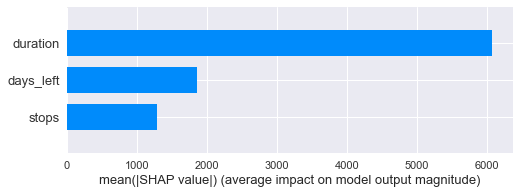

In [116]:
shap.summary_plot(shap_values, plot_type='bar')

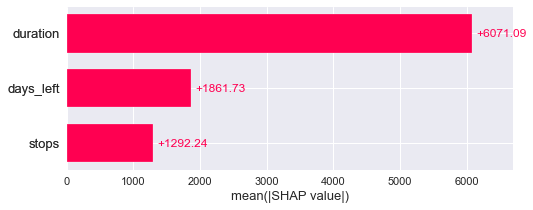

In [120]:
shap.plots.bar(shap_values)

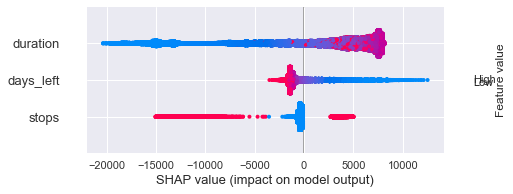

In [117]:
shap.summary_plot(shap_values)

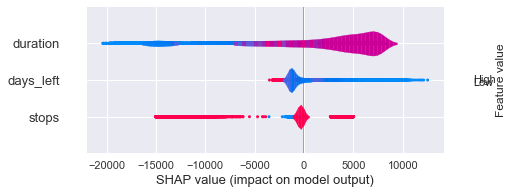

In [122]:
shap.summary_plot(shap_values, plot_type='violin')

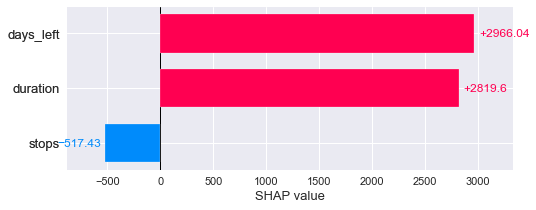

In [123]:
# Voir l'effet d'une seule observation
shap.plots.bar(shap_values[0])

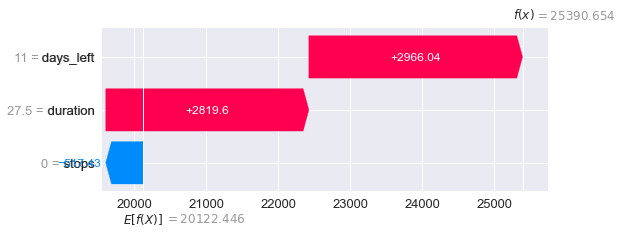

In [128]:
shap.plots.waterfall(shap_values[0])

### Shap pour les données catégorielles : 
https://towardsdatascience.com/shap-for-categorical-features-7c63e6a554ea